#Daffa Rizki Rizaly - 2301931251 - 	LD01

#1a.

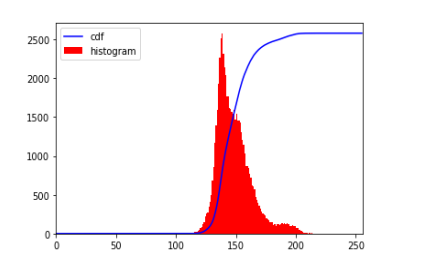


An image has a good contrast if the histogram shown has a widely spread distribution of pixel for the intensity valueand a large difference between the minimum intensity value and maximum intensity value. As we can see in the histogram above, the distribution of the pixel are bunched up in the centre. By seeing this, we can assume that the image is mainly all gray-ish. For the minimum intensity value is around 120 and the maximum is 220 so the difference between the minimum and maximum is narrow. With this information, we can assume the picture has a grayish and low contrast image.

To improve the image contrast there are 2 methods, contrast stretching and histogram equalization.


1.   Contrast Stretching (normalizing)

     Contrast Stretching is a method to increase the contrast of a picture by increasing the difference of the minimum and maximum. the other intensity values are spread out between this range.



2.   histogram equalization
     histogram equalization is a method to increase the contrast of a picture by modifying all intensity value of the pixel to distribute them uniformly to achieve "flattened" Histogram. There are many approaches for histogram but i'll use the classical histogram equalization. basically we have to find the cumulative sum of the histogram. we will sum all the values in histogram
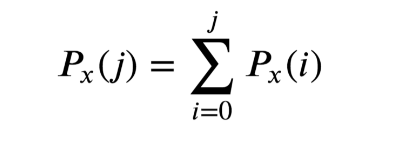
     
     After that, we will nomalize the values to confront the range 0 - 255. after that we will distribute the values with the function below
     
     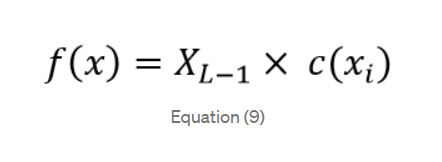


#1b

In [ ]:
#Import the dataset
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
#insert image and changing into graysclae
img = cv2.imread("/content/IMG_8928.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

in this part, we will make the histogram by flatting the arryay and displaying it with plt

(array([9.940000e+02, 1.748000e+03, 6.771000e+03, 1.430500e+04,
        1.479700e+04, 2.536100e+04, 4.385300e+04, 9.004700e+04,
        1.043810e+05, 1.295330e+05, 1.967280e+05, 1.652060e+05,
        1.628170e+05, 1.477930e+05, 1.717440e+05, 1.395510e+05,
        1.550070e+05, 2.322620e+05, 2.308610e+05, 2.953410e+05,
        3.920200e+05, 7.532210e+05, 8.331130e+05, 1.078874e+06,
        1.160079e+06, 1.404030e+06, 8.940560e+05, 5.248200e+05,
        3.737170e+05, 3.074220e+05, 2.853030e+05, 2.726770e+05,
        7.385280e+05, 4.775910e+05, 1.879670e+05, 1.338940e+05,
        3.595600e+04, 6.927000e+03, 2.566000e+03, 4.490000e+02,
        8.700000e+01, 8.400000e+01, 9.100000e+01, 5.600000e+01,
        4.500000e+01, 2.500000e+01, 2.800000e+01, 2.100000e+01,
        1.500000e+01, 6.000000e+00]),
 array([  0.  ,   4.28,   8.56,  12.84,  17.12,  21.4 ,  25.68,  29.96,
         34.24,  38.52,  42.8 ,  47.08,  51.36,  55.64,  59.92,  64.2 ,
         68.48,  72.76,  77.04,  81.32,  85.6 ,  8

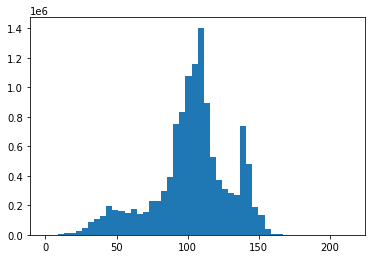

In [ ]:
# convert image into a numpy array
img = np.asarray(img)
# flatten the array to 1d array
flat = img.flatten()

# plot the histogram
plt.hist(flat, bins=50)

we will make a histogram for the image based on the frequency of similar intensity values

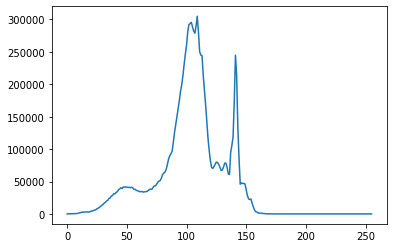

In [ ]:
# create our own histogram function
def get_histogram(image, bins):
    # declare new np array with bins as the size
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

we will calculate the cumulatative sum by looping and plot the cumulatative_sum

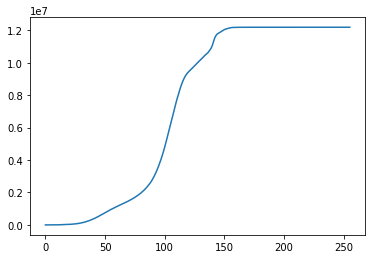

In [ ]:
#cumulative sum function
def cumulatative_sum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumulatative_sum(hist)

# display the result
plt.plot(cs)

After that we will normalize the cumulutative sum values to between 0 and 255

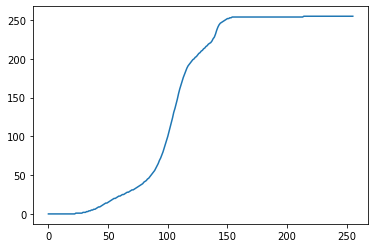

In [ ]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N
cs = cs.astype('uint8')
plt.plot(cs)

In this part, we will plot new flat histogram

(array([273764., 233789., 245404., 241610., 247931., 210897., 249638.,
        206884., 257537., 251368., 302298., 126099., 289334., 162901.,
        364262., 199478., 213411., 230849., 246297., 260072., 280441.,
        292064.,      0., 293558., 295477., 289017., 282027., 278738.,
             0., 289906., 304917., 280223., 250246., 244918., 244058.,
        213510., 359847., 258901., 179543., 291816., 235481., 278917.,
        228369., 217744., 224674., 173847., 244898., 346023., 226254.,
        273531.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

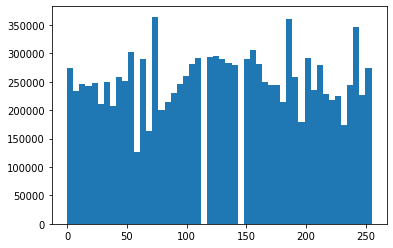

In [ ]:
# get the value from cumulative sum for every index in flat, and set that as img_new
flat_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(flat_new, bins=50)

after that we will change the shape of the 1d into 2darray with img shape

In [ ]:
# put array back into original shape since we flattened it
img_new = np.reshape(flat_new, img.shape)
img_new

array([[ 59, 136, 112, ..., 211, 211, 211],
       [ 72, 112,  85, ..., 213, 213, 213],
       [ 95, 100,  80, ..., 213, 213, 213],
       ...,
       [254, 254, 254, ...,  35,  43,  33],
       [254, 254, 254, ...,  31,  37,  30],
       [254, 254, 254, ...,  30,  31,  28]], dtype=uint8)

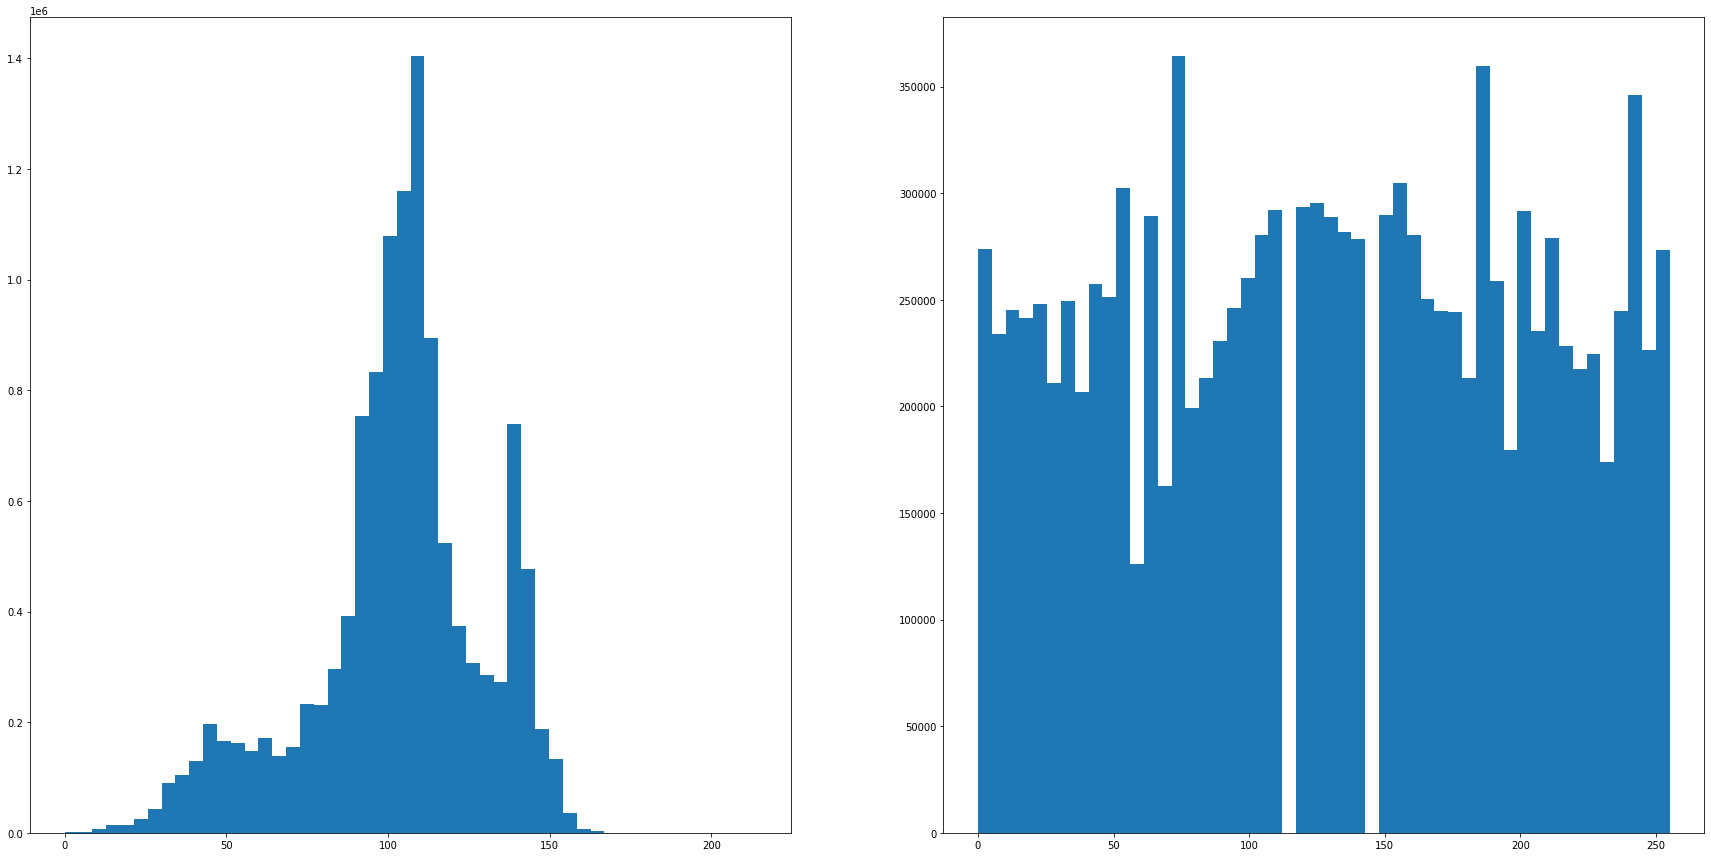

In [ ]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(30)

fig.add_subplot(1,2,1)
plt.hist(flat, bins=50)

# display the new image
fig.add_subplot(1,2,2)
plt.hist(flat_new, bins=50)

plt.show(block=True)

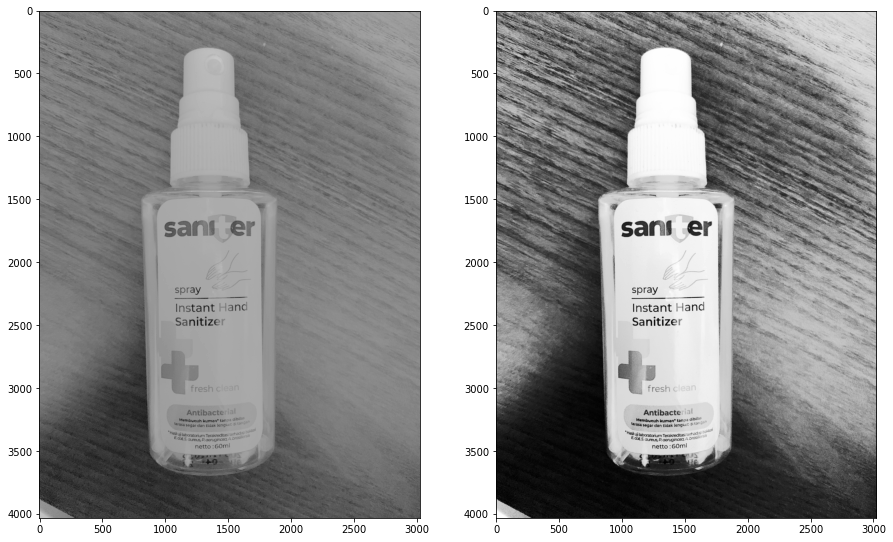

In [ ]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

Refferences:

1.   https://hackernoon.com/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23
2.   https://towardsdatascience.com/image-enhancement-techniques-using-opencv-and-python-9191d5c30d45

#2

In [ ]:
import numpy as np
from PIL import Image

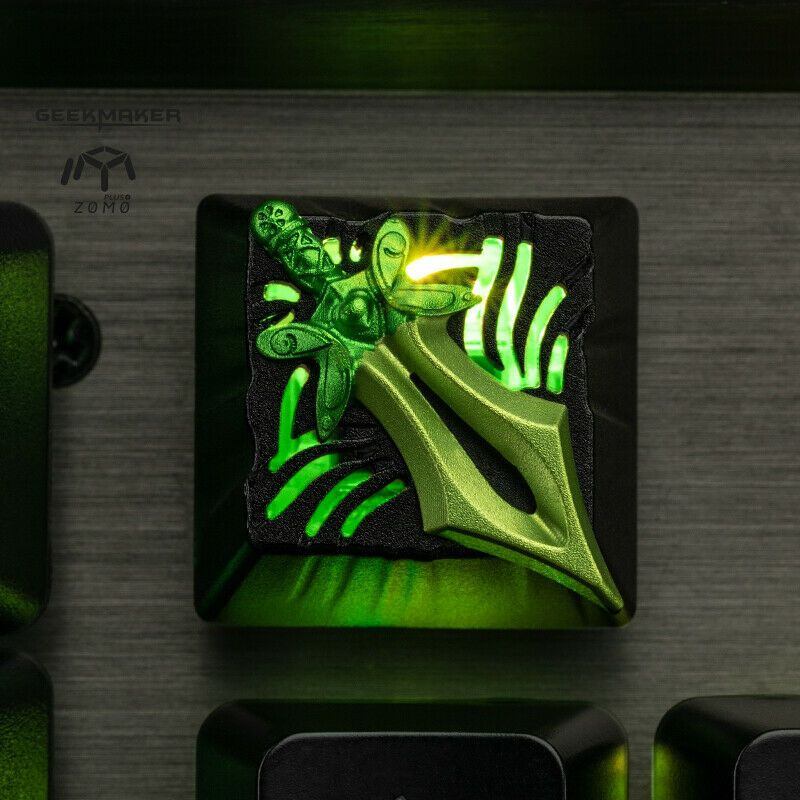

In [ ]:
#insert image and changing into graysclae
image = cv2.imread("/content/download (8).jpg")

cv2_imshow(image)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb006ae0b90>,
 <matplotlib.image.AxesImage at 0x7fb006a55f50>)

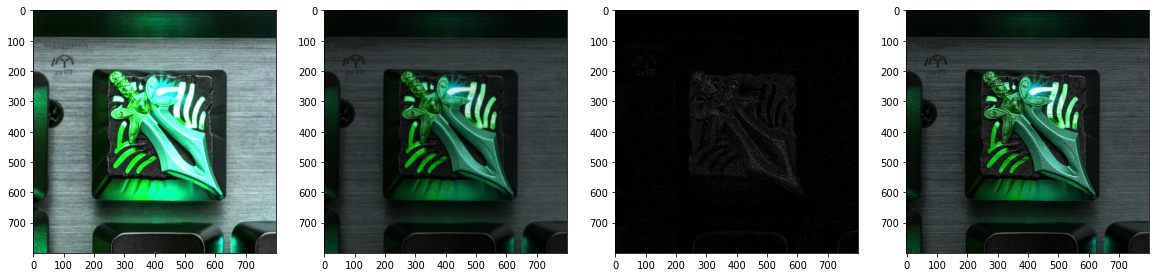

In [ ]:
filtering1 = cv2.filter2D(src=image, kernel=filter1, ddepth=-1)
filtering2 = cv2.filter2D(src=image, kernel=filter2, ddepth=-1)
filtering3 = cv2.filter2D(src=image, kernel=filter3, ddepth=-1)
filtering4 = cv2.filter2D(src=image, kernel=filter4, ddepth=-1)

plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(filtering1, cmap='gray')
plt.subplot(142), plt.imshow(filtering2, cmap='gray')
plt.subplot(143), plt.imshow(filtering3, cmap='gray')
plt.subplot(144), plt.imshow(filtering4, cmap='gray')

In [ ]:
filter1 = np.array([ [0, 0.2, 1], [0.2, 0.4, 0.2], [0, 0.2, 0.2] ], dtype=np.float32)
filter2 = np.array([ [0.1, 0.1, 0.1], [0.1, 0.1, 0.1], [0.1, 0.1, 0.1] ], dtype=np.float32)
filter3 = np.array([ [0, 0, 1], [0, -2, 0], [1, 0, 0] ], dtype=np.float32)
filter4 = np.array([ [0, -1, 0], [0, 3, 0], [0, -1, 0] ], dtype=np.float32)

As shown above, the filter #A has stronger brighten , filter #D is stronger 
blurring imageand filter #c stronger darken image

#Referrences


1.   https://stackoverflow.com/questions/63036809/how-do-i-use-only-numpy-to-apply-filters-onto-images
2.   https://python.plainenglish.io/image-filtering-and-editing-in-python-with-code-e878d2a4415d



#3

NMS is the third stage of canny edge detection. NMS does exactly what it says: it suppresses pixels that aren't maximal. A local maximum occurs when the gradient function reaches a peak, or when the gradient function's derivative is set to zero. canny edge detection perform non-maximum suppression to thin out the edges. It's possible that this will be broken at some point. We'll fix this by adding another threshold to fill in the gaps (with hysteresis)

After the image is thresholded, Based on the threshold results, the hysteresis consists of transforming weak pixels into strong pixels, where at least one of the neighboring pixels is a strong pixel. This process will the edge and 2 neighhbour pixel for 3 factors


1.   Keeping the direction in the same bin as the central pixel
2.   The magnitude of the gradient exceeds the lower threshold.
3.   You can label these pixels as an edge pixel if they are the maximum in comparison to their neighbors (nonmaximum suppression for these pixels).

After it loop until the end, you'll get your canny edge




In [ ]:
from scipy.ndimage.filters import convolve
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import cv2

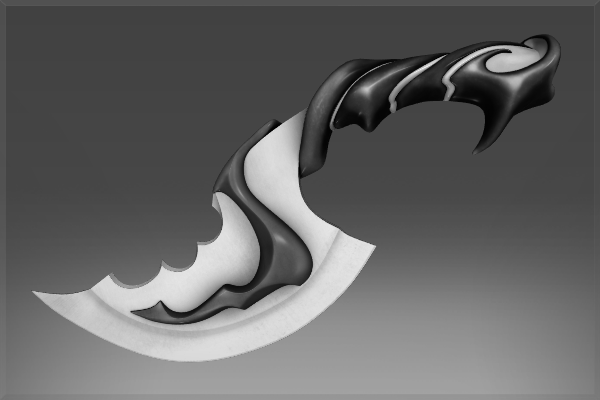

In [ ]:
#insert image and changing into graysclae
img = cv2.imread("/content/download (2).png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

In [ ]:
#make gaussioan_kernel function
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [ ]:
#convolving the gaussian kernel to the image
blur_img = convolve(img, gaussian_kernel(5, 1.4))

In [ ]:
#Filter the smoothed image vertically and horizontally with the Sobel kernel.
gradX = cv2.Sobel(blur_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
gradY = cv2.Sobel(blur_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)

#counting the gradient and finding theta
grad = np.sqrt(gradX ** 2 + gradY ** 2)
theta = np.arctan2(gradX, gradY)
theta = theta * 180.0 / np.pi
theta[theta < 0] += 180
theta = np.round(theta / 45).astype(np.int32)

In [1]:
#Non-Maximum Suppression
N, M = grad.shape
sup_img = np.zeros((N, M), dtype=np.int32)

dr = [0, -1, -1, -1, 0]
dc = [1, -1,  0,  1, 1]

for i in range(N):
    for j in range(M):
        try:
            q = 1
            r = 1

            q = grad[i + dr[theta[i][j]]][j + dc[theta[i][j]]]
            r = grad[i - dr[theta[i][j]]][j - dc[theta[i][j]]]

            if grad[i][j] >= q and grad[i][j] >= r:
                sup_img[i][j] = grad[i][j]

        except:
            pass

cv2_imshow(sup_img)

NameError: ignored

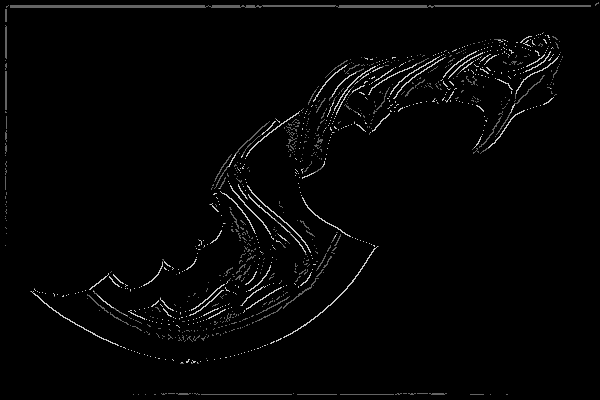

In [ ]:
#Using a double threshold (high threshold and low threshold), classify each pixel into one of three types:


#1. A strong pixel is one whose intensity is so great that we can be certain it contributes to the final edge.

#2. Weak pixel, defined as pixels with an intensity value that is not high enough to be called strong, but not low enough to be regarded irrelevant for edge detection.

#3. A pixel that isn't relevant

HIGH_THRES = 200
LOW_THRES = 100
H_RATIO = 0.15
L_RATIO = 0.05

high_thres = sup_img.max() * H_RATIO
low_thres = sup_img.max() * L_RATIO

thres_img = np.zeros((N, M), dtype=np.int32)

for i in range(N):
    for j in range(M):
        if sup_img[i][j] > high_thres:
            thres_img[i][j] = HIGH_THRES
        elif sup_img[i][j] > low_thres:
            thres_img[i][j] = LOW_THRES

cv2_imshow(thres_img)

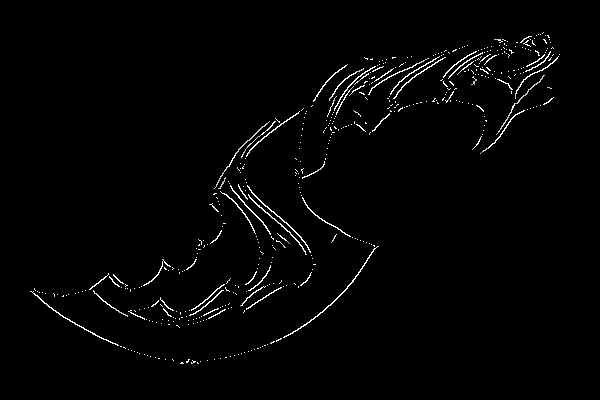

In [ ]:
#hysteresis thresholding
edge_img = np.zeros((N, M), dtype=np.int32)

queue = []
for i in range(N):
    for j in range(M):
        if thres_img[i][j] == HIGH_THRES:
            queue.append((i, j))
            edge_img[i][j] = 255

mx = [1, 1, 0, -1, -1, -1, 0, 1]
my = [0, 1, 1, 1, 0, -1, -1, -1]

curr_idx = 0
while True:
    if curr_idx >= len(queue):
        break

    x, y = queue[curr_idx]
    curr_idx += 1

    for i in range(8):
        nx = x + mx[i]
        ny = y + my[i]

        if nx < 0 or ny < 0 or nx >= N or ny >= M:
            continue;

        if thres_img[nx][ny] == LOW_THRES:
            thres_img[nx][ny] = HIGH_THRES
            edge_img[nx][ny] = HIGH_THRES
            queue.append((nx, ny))


cv2_imshow(edge_img)

Referrence:


1.   https://justin-liang.com/tutorials/canny/
2.   https://findanyanswer.com/what-is-hysteresis-in-image-edge-detection
3.   https://www.youtube.com/watch?v=sRFM5IEqR2w
4.   https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MARBLE/low/edges/canny.htm



#4

In [ ]:
from scipy.ndimage.filters import convolve
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import cv2

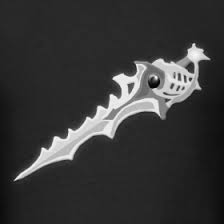

In [ ]:
#insert image and changing into graysclae
img = cv2.imread("/content/download (9).jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
w,h = gray.shape
cv2_imshow(gray)

In [ ]:
def GetSobel(image, Sobel, width, height):
    # Initialize the matrix
    I_d = np.zeros((width, height), np.float32)

    # For every pixel in the image
    for rows in range(width):
        for cols in range(height):
            # Run the Sobel kernel for each pixel
            if rows >= 1 or rows <= width-2 and cols >= 1 or cols <= height-2:
                for ind in range(3):
                    for ite in range(3):
                        I_d[rows][cols] += Sobel[ind][ite] * image[rows - ind - 1][cols - ite - 1]
            else:
                I_d[rows][cols] = image[rows][cols]

    return I_d

In [ ]:
def HarrisCornerDetection(image):

    # The two Sobel operators - for x and y direction
    SobelX = np.array([[-1, 0, 1], 
                       [-2, 0, 2], 
                       [-1, 0, 1]])
    SobelY = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]])

    w, h = image.shape

    # X and Y derivative of image using Sobel operator
    ImgX = GetSobel(image, SobelX, w, h)
    ImgY = GetSobel(image, SobelY, w, h)

    # Eliminate the negative values
    for ind1 in range(w):
        for ind2 in range(h):
            if ImgY[ind1][ind2] < 0:
                ImgY[ind1][ind2] *= -1
                # ImgY[ind1][ind2] = 0
            if ImgX[ind1][ind2] < 0:
                ImgX[ind1][ind2] *= -1
                # ImgX[ind1][ind2] = 0

    ImgX_2 = np.square(ImgX)
    ImgY_2 = np.square(ImgY)

    ImgXY = np.multiply(ImgX, ImgY)
    ImgYX = np.multiply(ImgY, ImgX)

    #Use Gaussian Blur
    Sigma = 1.4
    kernelsize = (3, 3)

    ImgX_2 = cv2.GaussianBlur(ImgX_2, kernelsize, Sigma)
    ImgY_2 = cv2.GaussianBlur(ImgY_2, kernelsize, Sigma)
    ImgXY = cv2.GaussianBlur(ImgXY, kernelsize, Sigma)
    ImgYX = cv2.GaussianBlur(ImgYX, kernelsize, Sigma)
    # print(ImgXY.shape, ImgYX.shape)

    alpha = 0.06
    R = np.zeros((w, h), np.float32)
    # For every pixel find the corner strength
    for row in range(w):
        for col in range(h):
            M_bar = np.array([[ImgX_2[row][col], ImgXY[row][col]], [ImgYX[row][col], ImgY_2[row][col]]])
            R[row][col] = np.linalg.det(M_bar) - (alpha * np.square(np.trace(M_bar)))
    return R

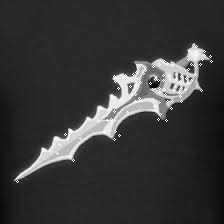

In [ ]:
R = HarrisCornerDetection(gray)

# Empirical Parameter
# This parameter will need tuning based on the use-case
CornerStrengthThreshold = 600000

# Plot detected corners on image
radius = 1
color = (255, 0, 0)  # Green
thickness = 1

PointList = []
# Look for Corner strengths above the threshold
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            # print(R[row][col])
            max = R[row][col]

            # Local non-maxima suppression
            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max:
                            skip = True
                            break

            if not skip:
                # Point is expressed in x, y which is col, row
                cv2.circle(gray, (col, row), radius, color, thickness)
                PointList.append((row, col))

# Display image indicating corners and save it
cv2_imshow(gray)

#5
keypoints are interest points in images where they are spatial locations, or points in the image that is interesting or stands out from the image. To achieve this keypoint we can use one of the feature descriptor. Feature descriptor works by locateing certain key points and then furnishes them with quantitative information (so-called descriptors). Today, i'll be using SURF)Speeded Up Robust Features). SURF is a fast and robust local feature descriptor. Surf uses box filter to compute quickly. SURF consist of 2 steps.



1.   Feature Extraction

      The feature extraction of surf is based Hessian matrix approximation,uses a further approximated DoG(Difference of Gaussian) and uses intergral image. Firstly we will count the value of determinant of hessian matrix for every pixel which is computed using integral images. 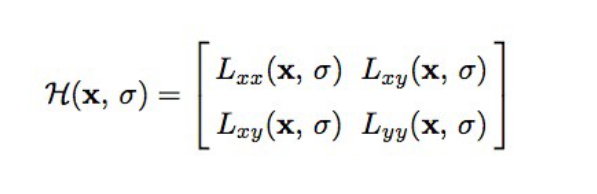

      where Lxx(x, σ) is the convolution of the Gaussian second order derivative with the image I in point x, and similarly for Lxy (x, σ) and Lyy (x, σ). x is the location of the keypoint and σ is the scale. 

      After that, SURF uses box filters to fasten the approximation(both convolution and second-order derivative) even further. These approximate second-order Gaussian derivatives and can be evaluated at a very low computational cost using integral images and independently of size, and this is part of the reason why SURF is fast.

      After that we will use scale-space representation with image pyramid. we willbe smoothen with gaussian and will be put on top of the original image. By using integral image and box filter, SURF could directly apply filter to the original image with same speed.herefore, the scale space is analyzed by up-scaling the filter size rather than reducing image size. After that , to localize interest points in the image and over scales, a nonmaximum suppression in a 3 × 3 × 3 neighborhood is applied.

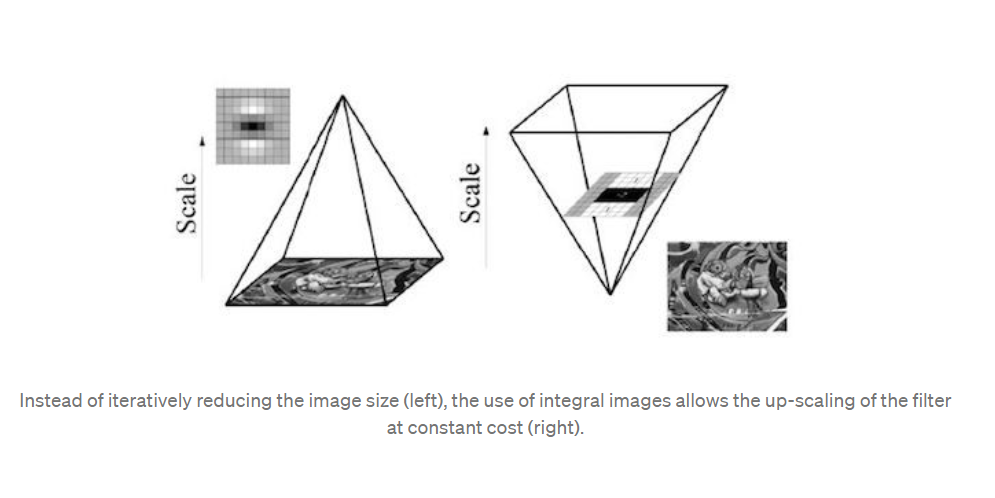

2.   Feature Description

      The feature description will describes a distribution  of Haarwavelet response between the neighbours of the interest point and uses 64 dimension.

      There are 2 steps in feature description that is,

      1. Orientation Assignment
        To begin, SURF calculates the Haar-wavelet responses in the x and y directions in the neighborgood of radius 6s around the keypoint given scale s in the neighborgood of radius 6s around the keypoint given scale s. The size of the valets is large in high sclae, thus we employ an intgral image for quick filtering.


Then, in a scanning area, we will repeatedly calculate the total of vertical and horizontal wavelet responses, then alter the scanning orientation (add /3), and recalculate until we discover the orientation with the biggest sum value, which will be the main orientation of the feature descriptor.

      2. Extracting descriptor

        The first step is to create a square region centered on the keypoint and orientated in the direction we established earlier. This window is 20s in size.The territory is then divided into smaller 4 4 square sub-regions on a regular basis. At 55 regularly spaced sample points, we compute a few simple features for each sub-region. The Haar wavelet response in the horizontal direction is referred to as dx, and the Haar wavelet response in the vertical direction is referred to as dy (filter size 2s). The answers dx and dy are first weighted using a Gaussian (= 3.3s) centered at the keypoint to strengthen their resilience against geometric deformations and localization mistakes.

        The wavelet responses dx and dy are then added together over each subregion to generate an initial set of feature vector entries. We additionally extract the sum of the absolute values of the responses, |dx| and |dy|, to bring in information about the polarity of the intensity changes. As a result, each sub-underlying region's intensity structure V = (dx, dy,|dx|,|dy|) contains a four-dimensional descriptor vector v. This yields a 64-bit descriptor vector for all 44 sub-regions. (Our descriptor in Sift is the 128-D vector, which is one of the reasons SURF is faster than Sift.)







After we find the keypoints, we will use FlannBasedMather to match the keypoint. FLANN is an acronym for Fast Library for Approximate Nearest Neighbors. It includes a series of techniques that are optimized for rapid nearest neighbor searches in huge datasets and high-dimensional characteristics.  Flann.knnbased will be used to compute matchesmatches of the k closest neighbors.

In [ ]:
#!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 1.4 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
#import library
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
#Importing image and preprocessing

#import image
img = cv2.imread("/content/Freddie's Book.jpg")
scene = cv2.imread("/content/8.jpg")

#changing rgb into grayscale image
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
scene = cv2.cvtColor(scene,cv2.COLOR_BGR2GRAY)

#equalize histogram
img = cv2.equalizeHist(img)
scene = cv2.equalizeHist(scene)

In [ ]:
#Using SURF as keypoint extraction
SURF = cv2.xfeatures2d.SURF_create()
keypoint_img, descriptor_img = SURF.detectAndCompute(img,None)
keypoint_scene, descriptor_scene = SURF.detectAndCompute(scene,None)

In [ ]:
#This matcher trains on a train descriptor collection and calls its nearest search methods to find the best matches. 
index_params = dict(algorithm = 0)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [ ]:
#list array 2d
matches = flann.knnMatch(descriptor_img,descriptor_scene,k = 2)

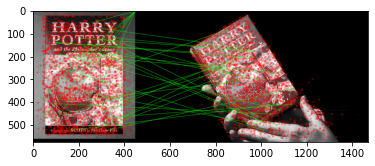

In [ ]:
#teori lowe
valid_matches = []
for i in range(len(matches)):
    valid_matches.append([0,0])
    
for idx,(m,n) in enumerate(matches):
    if m.distance < 0.63 * n.distance:
        valid_matches[idx] = [1,0]
        
#draws all the k best matches
result_img = cv2.drawMatchesKnn(
    scene,
    keypoint_scene,
    img,
    keypoint_img,
    matches,
    None,
    matchColor = [0,255,0],
    singlePointColor =[255,0,0],
    matchesMask = valid_matches
)
plt.imshow(result_img)
plt.show()

#Reference


1.   Coding lab
2.   https://medium.com/data-breach/introduction-to-surf-speeded-up-robust-features-c7396d6e7c4e
3. https://www.cs.umd.edu/class/spring2020/cmsc426-0201/files/14_SURF.pdf

